In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
with open('../data/model_annotations.aligned.jsonl', 'r') as input_file:
    lines = input_file.readlines()

df = pd.DataFrame(columns=["text", "coherence_expert", "coherence_turker"])

for line in lines:
    line = json.loads(line)
    
    anns = line['expert_annotations']
    anns_turker = line['turker_annotations']
    
    coherence_anns = [ann['coherence'] for ann in anns]
    coherence_anns_turker = [ann['coherence'] for ann in anns_turker]
    
    coherence_score = sum(coherence_anns) / len(coherence_anns)
    coherence_score_turker = sum(coherence_anns_turker) / len(coherence_anns_turker)
    
    df = df.append({"text": line['decoded'], 'coherence_expert': coherence_score, 'coherence_turker': coherence_score_turker}, ignore_index=True)

In [13]:
# df.head(5)

### Create text files
These are the files we put in the `/documents` folder when we want to run the GisPy

In [3]:
texts = []
doc_folder = '../data/documents'
for i in range(len(df)):
    text = df.iloc[i]['text']
    if text not in texts:
        texts.append(text)
        with open('{}/se_{}_{}_{}.txt'.format(doc_folder, i, df.iloc[i]['coherence_expert'], df.iloc[i]['coherence_turker']), 'w') as text_file:
            text_file.write(text)

## Result Analysis
Once we ran the GisPy, as output, we will have a `results.xlsx` file. This file is the input to our analysis here.

In [2]:
df = pd.read_csv('../gispy/results.csv')

<AxesSubplot:xlabel='gis', ylabel='Count'>

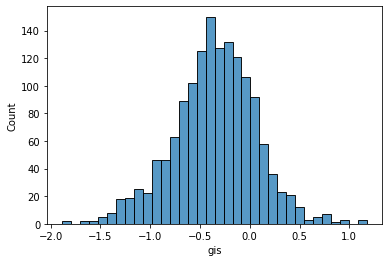

In [3]:
sn.histplot(df['gis'])

<AxesSubplot:xlabel='gis_zscore', ylabel='Count'>

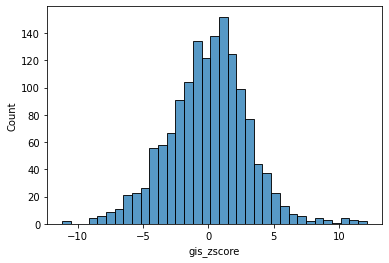

In [4]:
sn.histplot(df['gis_zscore'])

In [5]:
# creating a new data frame with our scores and gold scores (experts + turkers)
df_new = pd.DataFrame(columns=['coh_expert', 'coh_turker', 'gis', 'gis_z'])

for idx, row in df.iterrows():
    vals = row['d_id'].strip('.txt').split('_')
    df_new = df_new.append({'coh_expert': vals[2], 'coh_turker': vals[3], 'gis': row['gis'], 'gis_z': row['gis_zscore']}, ignore_index=True)

df_new = df_new.sort_values(by=['coh_expert'])

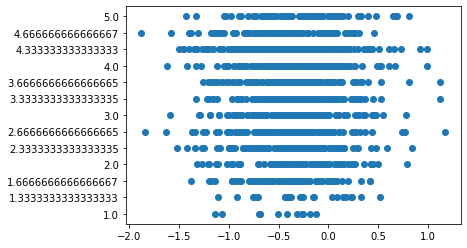

In [6]:
plt.scatter(df_new['gis'], df_new['coh_expert'])
plt.show()

In [7]:
x = df_new['gis'].values.reshape(-1, 1)
y = df_new['coh_expert'].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_)

# Predict a Response and print it:
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.0002526966697912192
intercept: [3.37682447]
slope: [[0.03923167]]
Predicted response:
[[3.36447738]
 [3.37183414]
 [3.33495013]
 ...
 [3.38962207]
 [3.37925494]
 [3.38088704]]
